## Prepare

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

   MCS/RB   1    2    3    4    5    6    7    8    9  ...    91    92    93  \
0       0  32   64   96  128  168  208  240  272  304  ...  3104  3104  3240   
1       1  40   88  128  176  224  272  304  352  408  ...  3976  4040  4104   
2       2  48  104  160  224  272  320  384  432  504  ...  4872  5000  5000   
3       3  64  136  208  288  352  432  504  576  640  ...  6408  6536  6536   
4       4  80  168  256  352  432  528  608  704  808  ...  7808  7936  8064   

     94    95    96    97    98    99   100  
0  3240  3240  3240  3368  3368  3368  3368  
1  4104  4232  4232  4232  4360  4360  4360  
2  5128  5128  5256  5256  5256  5384  5384  
3  6664  6664  6792  6792  6920  6920  7048  
4  8064  8192  8192  8456  8456  8456  8712  

[5 rows x 101 columns]


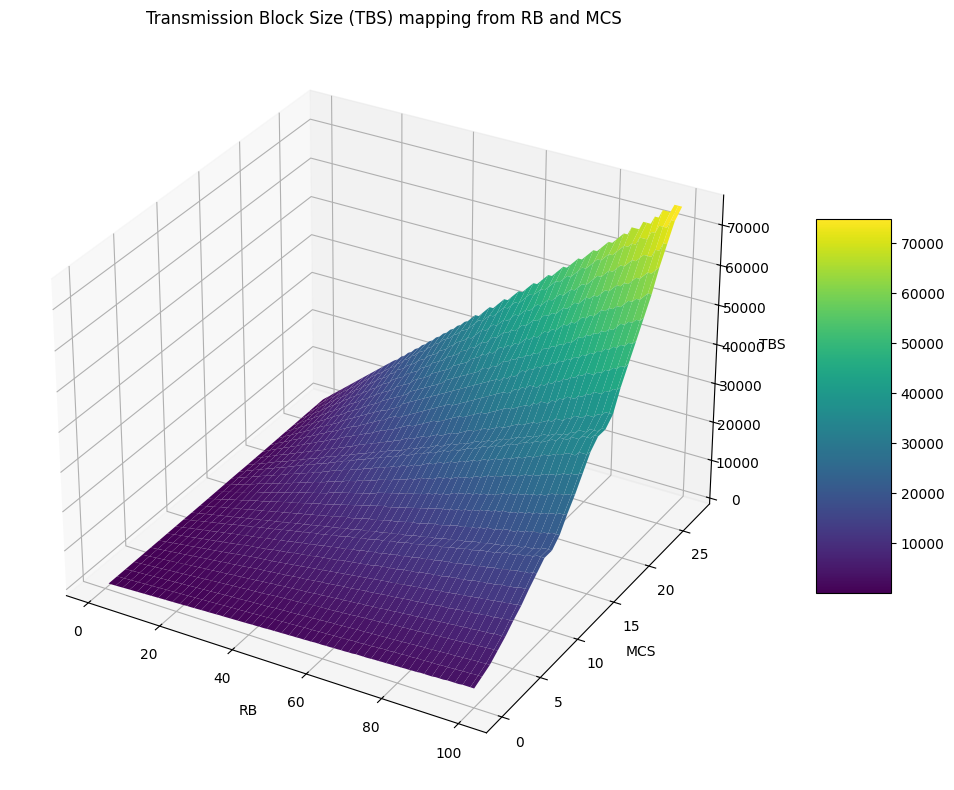

In [2]:
TBS = pd.read_csv('./Simulation/TBSArray.csv')

print(TBS.head(5))

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X = np.arange(1, 101)  # RB
Y = np.arange(0, 28)   # MCS
X, Y = np.meshgrid(X, Y)
Z = TBS.iloc[:, 1:].astype(float).values

surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis)
ax.set_xlabel('RB')
ax.set_ylabel('MCS')
ax.set_zlabel('TBS')
ax.set_title('Transmission Block Size (TBS) mapping from RB and MCS')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()

In [3]:
# Burst Traffic
# RoundRobin_BurstTraffic = pd.read_csv('./Simulation/result/burst_traffic/rr.csv')
# MaxCQI_BurstTraffic = pd.read_csv('./Simulation/result/burst_traffic/max_cqi.csv')
# PF_BurstTraffic = pd.read_csv('./Simulation/result/burst_traffic/pf.csv')

# High Traffic
RoundRobin_HighTraffic = pd.read_csv('./Simulation/result/high_traffic/rr.csv')
MaxCQI_HighTraffic = pd.read_csv('./Simulation/result/high_traffic/max_cqi.csv')
PF_HighTraffic = pd.read_csv('./Simulation/result/high_traffic/pf.csv')

# Ideal Traffic 100000 bits
RoundRobin_IdealTraffic = pd.read_csv('./Simulation/result/ideal_condition_bsr100000/rr.csv')
MaxCQI_IdealTraffic = pd.read_csv('./Simulation/result/ideal_condition_bsr100000/max_cqi.csv')
PF_IdealTraffic = pd.read_csv('./Simulation/result/ideal_condition_bsr100000/pf.csv')

# Low Traffic
RoundRobin_LowTraffic = pd.read_csv('./Simulation/result/low_traffic/rr.csv')
MaxCQI_LowTraffic = pd.read_csv('./Simulation/result/low_traffic/max_cqi.csv')
PF_LowTraffic = pd.read_csv('./Simulation/result/low_traffic/pf.csv')

# # Mobility Pattern
# RoundRobin_MobilityPattern = pd.read_csv('./Simulation/result/mobility_pattern/rr.csv')
# MaxCQI_MobilityPattern = pd.read_csv('./Simulation/result/mobility_pattern/max_cqi.csv')
# PF_MobilityPattern = pd.read_csv('./Simulation/result/mobility_pattern/pf.csv')


# Create DataFrame for each property such as: Scheduler Count, Avg Throughput, Max Delay, Avg Delay having 4 columns is UE, RoundRobin, MaxCQI, PF
ue = [col for col in RoundRobin_HighTraffic.columns if col.startswith('UE')]
scheduler_count_DF1 = pd.DataFrame(index=ue)
avg_throughput_DF1 = pd.DataFrame(index=ue)
max_delay_DF1 = pd.DataFrame(index=ue)
avg_delay_DF1 = pd.DataFrame(index=ue)

scheduler_count_DF2 = pd.DataFrame(index=ue)
avg_throughput_DF2 = pd.DataFrame(index=ue)
max_delay_DF2 = pd.DataFrame(index=ue)
avg_delay_DF2 = pd.DataFrame(index=ue)

scheduler_count_DF3 = pd.DataFrame(index=ue)
avg_throughput_DF3 = pd.DataFrame(index=ue)
max_delay_DF3 = pd.DataFrame(index=ue)
avg_delay_DF3 = pd.DataFrame(index=ue)

scheduler_count_DF4 = pd.DataFrame(index=ue)
avg_throughput_DF4 = pd.DataFrame(index=ue)
max_delay_DF4 = pd.DataFrame(index=ue)
avg_delay_DF4 = pd.DataFrame(index=ue)

scheduler_count_DF5 = pd.DataFrame(index=ue)
avg_throughput_DF5 = pd.DataFrame(index=ue)
max_delay_DF5 = pd.DataFrame(index=ue)
avg_delay_DF5 = pd.DataFrame(index=ue)

scenario = ['Burst Traffic', 'High Traffic', 'Ideal Traffic', 'Low Traffic', 'Mobility Pattern']
total_throughput_DF1 = pd.DataFrame(index=scenario, columns=['Round Robin', 'Max CQI', 'PF'])
total_fairness_DF1 = pd.DataFrame(index=scenario, columns=['Round Robin', 'Max CQI', 'PF'])

## Data input

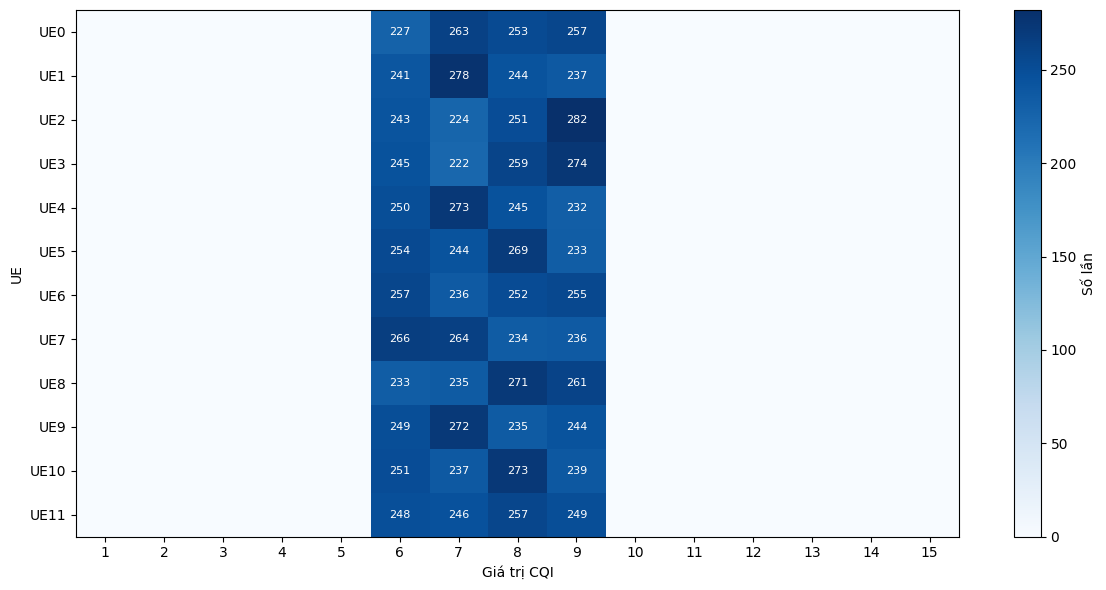

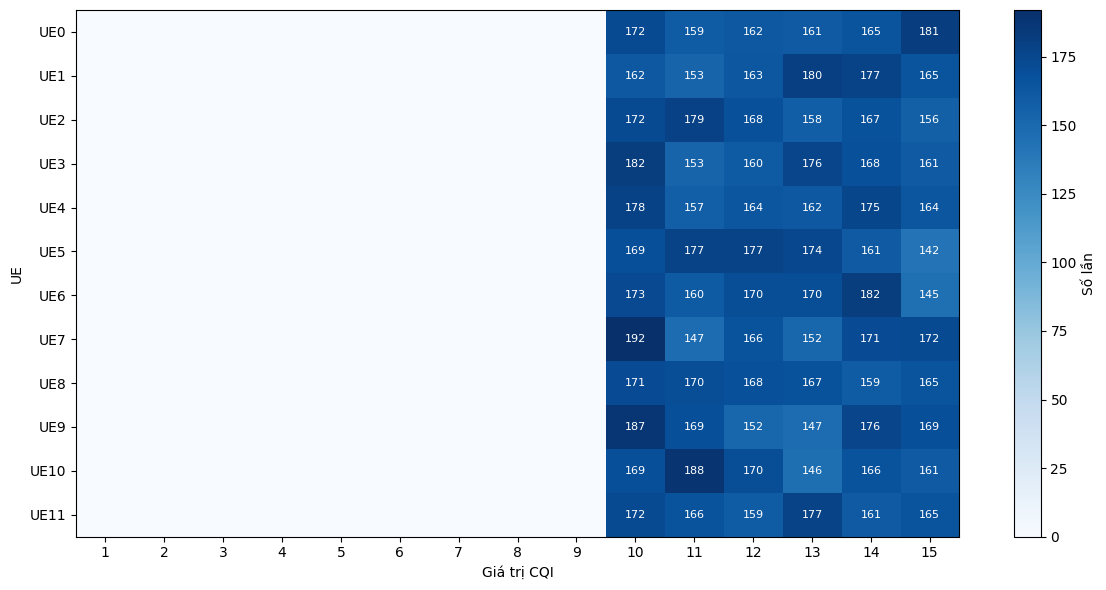

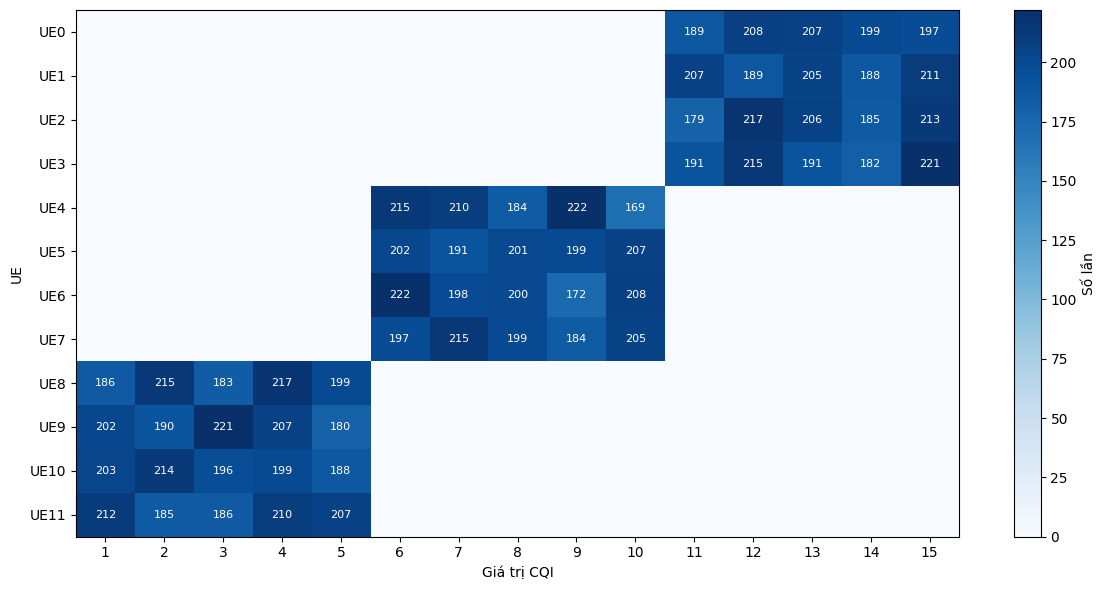

In [4]:
def read_sampled_bsr(csv_path):
    df = pd.read_csv(csv_path)
    return df.iloc[1::10].reset_index(drop=True)

def plot_cqi_count_heatmap(df, cmap='Blues', title=''):
    cqi_bins = list(range(1, 16))
    ue_labels = df.columns

    # Tính số lần xuất hiện giá trị CQI từ 1 đến 15 cho mỗi UE
    count_data = []
    for ue in ue_labels:
        counts = df[ue].value_counts().reindex(cqi_bins, fill_value=0)
        count_data.append(counts.values)

    heatmap_data = np.array(count_data)

    fig, ax = plt.subplots(figsize=(12, 6))
    cax = ax.imshow(heatmap_data, cmap=cmap, aspect='auto')

    # Gắn nhãn
    ax.set_xticks(np.arange(len(cqi_bins)))
    ax.set_yticks(np.arange(len(ue_labels)))
    ax.set_xticklabels(cqi_bins)
    ax.set_yticklabels(ue_labels)

    # Hiển thị giá trị trong từng ô
    for i in range(len(ue_labels)):
        for j in range(len(cqi_bins)):
            value = heatmap_data[i, j]
            if value > 0:
                ax.text(j, i, str(value), ha="center", va="center", color="white", fontsize=8)

    plt.title(title)
    plt.xlabel("Giá trị CQI")
    plt.ylabel("UE")
    plt.colorbar(cax, label='Số lần')
    plt.tight_layout()
    plt.show()
plot_cqi_count_heatmap(read_sampled_bsr('./Simulation/data/cqi_high_traffic.csv'))
plot_cqi_count_heatmap(read_sampled_bsr('./Simulation/data/cqi_low_traffic.csv'))
plot_cqi_count_heatmap(read_sampled_bsr('./Simulation/data/cqi_ideal_condition_bsr100000.csv'))

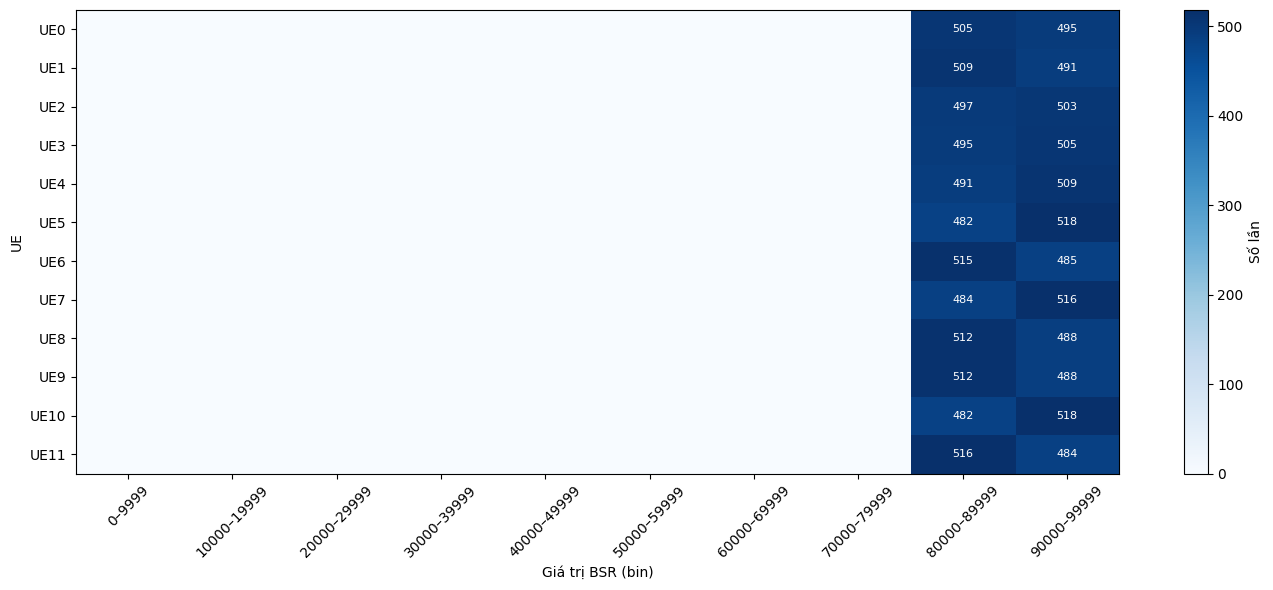

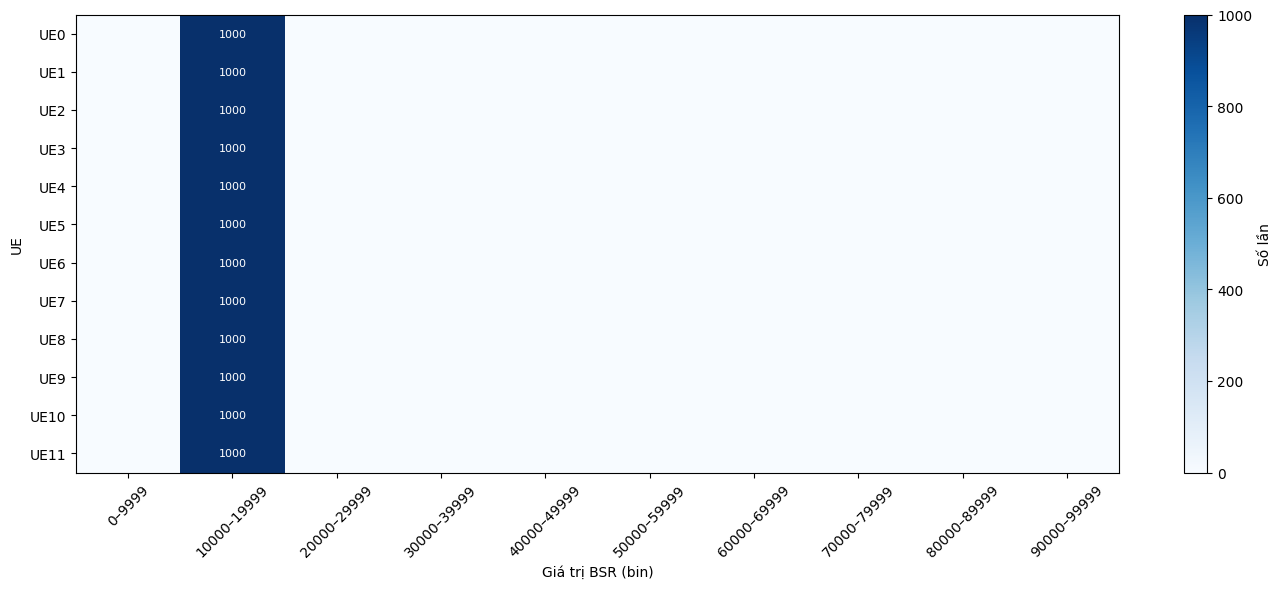

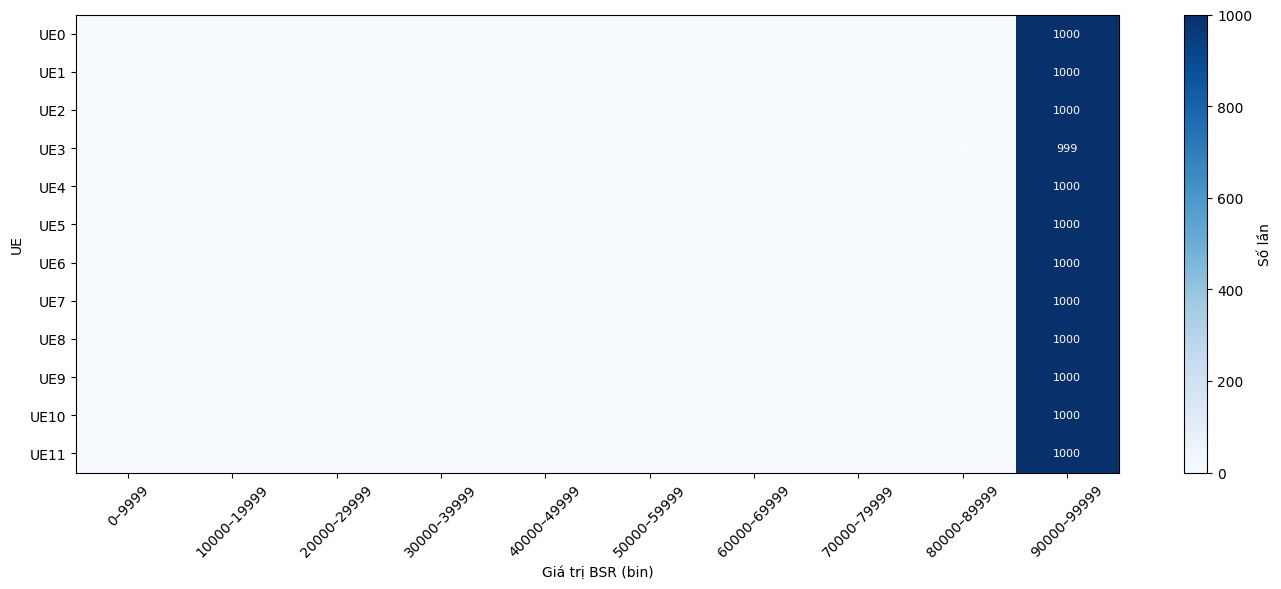

In [5]:


def plot_bsr_count_heatmap(df, bins=None, cmap='Blues', title=''):
    ue_labels = df.columns
    
    # Thiết lập bin mặc định nếu không truyền vào
    if bins is None:
        bins = list(range(0, 110000, 10000))  # 0–100000 chia mỗi 10.000
    
    bin_labels = [f"{bins[i]}–{bins[i+1]-1}" for i in range(len(bins)-1)]

    # Tính số lần xuất hiện mỗi bin cho từng UE
    count_data = []
    for ue in ue_labels:
        binned = pd.cut(df[ue], bins=bins, labels=bin_labels, include_lowest=True)
        counts = binned.value_counts().reindex(bin_labels, fill_value=0)
        count_data.append(counts.values)

    heatmap_data = np.array(count_data)

    fig, ax = plt.subplots(figsize=(14, 6))
    cax = ax.imshow(heatmap_data, cmap=cmap, aspect='auto')

    # Nhãn trục
    ax.set_xticks(np.arange(len(bin_labels)))
    ax.set_yticks(np.arange(len(ue_labels)))
    ax.set_xticklabels(bin_labels, rotation=45)
    ax.set_yticklabels(ue_labels)

    # Annotate từng ô
    for i in range(len(ue_labels)):
        for j in range(len(bin_labels)):
            val = heatmap_data[i, j]
            if val > 0:
                ax.text(j, i, str(val), ha='center', va='center', color='white', fontsize=8)

    plt.title(title)
    plt.xlabel("Giá trị BSR (bin)")
    plt.ylabel("UE")
    plt.colorbar(cax, label="Số lần")
    plt.tight_layout()
    plt.show()

plot_bsr_count_heatmap(read_sampled_bsr('./Simulation/data/bsr_high_traffic.csv'))
plot_bsr_count_heatmap(read_sampled_bsr('./Simulation/data/bsr_low_traffic.csv'))
plot_bsr_count_heatmap(read_sampled_bsr('./Simulation/data/bsr_ideal_condition_bsr100000.csv'))

## Ideal 100000bit

### Round Robin

In [6]:
ue = [col for col in RoundRobin_IdealTraffic.columns if col.startswith('UE')]
RoundRobin_IdealTraffic_UE = RoundRobin_IdealTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (RoundRobin_IdealTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = RoundRobin_IdealTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    scheduled_idx = series[series > 0].index
    delay_list = []
    prev = -1
    for idx in scheduled_idx:
        if prev != -1:
            delay = idx - prev - 1
            delay_list.append(delay)
        prev = idx
    return pd.Series({
        'Max Delay': max(delay_list) if delay_list else 0,
        'Avg Delay': np.mean(delay_list) if delay_list else 0
    })

delays = RoundRobin_IdealTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF3['Round Robin'] = summary['Scheduler Count']
avg_throughput_DF3['Round Robin'] = summary['Avg Throughput (Mbps)']
max_delay_DF3['Round Robin'] = summary['Max Delay']
avg_delay_DF3['Round Robin'] = summary['Avg Delay']


total_throughput_DF1.at['Round Robin', 'Throughput'] = total_throughput_mbps
# Calculate Jain's Fairness Index for the cell
x = summary['Avg Throughput (Mbps)'].to_numpy()
total_fairness_DF1.at['Round Robin', 'Throughput'] = (x.sum())**2 / (len(x) * (x**2).sum())



Avg Throughput for cell: 29.350662 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3334                25              54.235088        2.0   
UE1              3334                25              54.439416        2.0   
UE2              3334                25              53.952792        2.0   
UE3              3334                25              54.269640        2.0   
UE4              3333                25              26.444392        2.0   
UE5              3333                25              25.766280        2.0   
UE6              3333                25              26.364000        2.0   
UE7              3333                25              25.575304        2.0   
UE8              3333                25               7.628568        2.0   
UE9              3333                25               7.863992        2.0   
UE10             3333                25               7.660144        2.0  

### Max CQI

In [ ]:
ue = [col for col in MaxCQI_IdealTraffic.columns if col.startswith('UE')]
MaxCQI_IdealTraffic_UE = MaxCQI_IdealTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (MaxCQI_IdealTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = MaxCQI_IdealTraffic_UE.sum() / 1_000_000
# 4. Calculating Max Delay and Avg Delay between scheduled UEs
def calc_delays(series):
    series_values = series.to_numpy()
    scheduled_idx = np.where(series_values > 0)[0]
    total_length = len(series_values)

    if len(scheduled_idx) == 0:
        return pd.Series({
            'Max Delay': total_length,
            'Avg Delay': 0
        })

    if len(scheduled_idx) == 1:
        t = scheduled_idx[0]
        return pd.Series({
            'Max Delay': max(t, total_length - 1 - t),
            'Avg Delay': 0
        })

    # Tính delay giữa các lần lập lịch
    delay_list = np.diff(scheduled_idx) - 1

    return pd.Series({
        'Max Delay': delay_list.max(),
        'Avg Delay': delay_list.mean()
    })

delays = MaxCQI_IdealTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF3['Max CQI'] = summary['Scheduler Count']
avg_throughput_DF3['Max CQI'] = summary['Avg Throughput (Mbps)']
max_delay_DF3['Max CQI'] = summary['Max Delay']
avg_delay_DF3['Max CQI'] = summary['Avg Delay']


total_throughput_DF1.at['Max CQI', 'Throughput'] = total_throughput_mbps
# Calculate Jain's Fairness Index for the cell
x = summary['Avg Throughput (Mbps)'].to_numpy()
total_fairness_DF1.at['Max CQI', 'Throughput'] = (x.sum())**2 / (len(x) * (x**2).sum())

Avg Throughput for cell: 44.064422 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              6486                25             103.892392        5.0   
UE1              6439                25             103.474424        5.0   
UE2              6505                25             103.547248        5.0   
UE3              6467                25             103.609784        5.0   
UE4              3724                25              30.553200        8.0   
UE5              3579                25              28.751872        8.0   
UE6              3497                25              28.572208        8.0   
UE7              3303                25              26.371936        8.0   
UE8                 0                 0               0.000000    10000.0   
UE9                 0                 0               0.000000    10000.0   
UE10                0                 0               0.000000    10000.0  

### Proportional Fair

In [8]:
ue = [col for col in PF_IdealTraffic.columns if col.startswith('UE')]
PF_IdealTraffic_UE = PF_IdealTraffic[ue]

summary = pd.DataFrame(index=ue)

# 1. Number of times each UE is scheduled
summary['Scheduler Count'] = (PF_IdealTraffic_UE > 0).sum()
# 2. Average RB Scheduled for each UE
summary['Avg RB Scheduled'] = summary['Scheduler Count'].apply(lambda x: 25 if x > 0 else 0)
# 3. Average Throughput for each UE
summary['Avg Throughput (Mbps)'] = PF_IdealTraffic_UE.sum() / 1_000_000


x = summary['Avg Throughput (Mbps)'].to_numpy()
fairness_index = (x.sum())**2 / (len(x) * (x**2).sum())
print("Jain's Fairness Index: {:.4f}".format(fairness_index))

def calc_delays(series):
    series_values = series.to_numpy()
    scheduled_idx = np.where(series_values > 0)[0]
    total_length = len(series_values)

    if len(scheduled_idx) == 0:
        return pd.Series({
            'Max Delay': total_length,
            'Avg Delay': 0
        })

    if len(scheduled_idx) == 1:
        t = scheduled_idx[0]
        return pd.Series({
            'Max Delay': max(t, total_length - 1 - t),
            'Avg Delay': 0
        })

    # Tính delay giữa các lần lập lịch
    delay_list = np.diff(scheduled_idx) - 1

    return pd.Series({
        'Max Delay': delay_list.max(),
        'Avg Delay': delay_list.mean()
    })


delays = PF_IdealTraffic_UE.apply(calc_delays)
summary['Max Delay'] = delays.loc['Max Delay']
summary['Avg Delay'] = delays.loc['Avg Delay']

# 5. Sum of Throughput for cell
total_throughput_mbps = summary['Avg Throughput (Mbps)'].sum() / 12
print("Avg Throughput for cell: {:.6f} Mbps".format(total_throughput_mbps))

# printing the summary
print("\n===== UE Scheduling Statistics =====")
print(summary)

scheduler_count_DF3['PF'] = summary['Scheduler Count']
avg_throughput_DF3['PF'] = summary['Avg Throughput (Mbps)']
max_delay_DF3['PF'] = summary['Max Delay']
avg_delay_DF3['PF'] = summary['Avg Delay']

total_throughput_DF1.at['PF', 'Throughput'] = total_throughput_mbps
# Calculate Jain's Fairness Index for the cell
x = summary['Avg Throughput (Mbps)'].to_numpy()
total_fairness_DF1.at['PF', 'Throughput'] = (x.sum())**2 / (len(x) * (x**2).sum())


Jain's Fairness Index: 0.7206
Avg Throughput for cell: 33.022632 Mbps

===== UE Scheduling Statistics =====
      Scheduler Count  Avg RB Scheduled  Avg Throughput (Mbps)  Max Delay  \
UE0              3579                25              59.634704       12.0   
UE1              3581                25              59.922496       12.0   
UE2              3580                25              59.465192       13.0   
UE3              3579                25              59.794584       12.0   
UE4              3376                25              30.139248       21.0   
UE5              3377                25              29.435008       19.0   
UE6              3376                25              30.052216       19.0   
UE7              3369                25              29.142552       21.0   
UE8              3024                25               9.466752       33.0   
UE9              3043                25               9.775576       33.0   
UE10             3069                25      

### Analysics

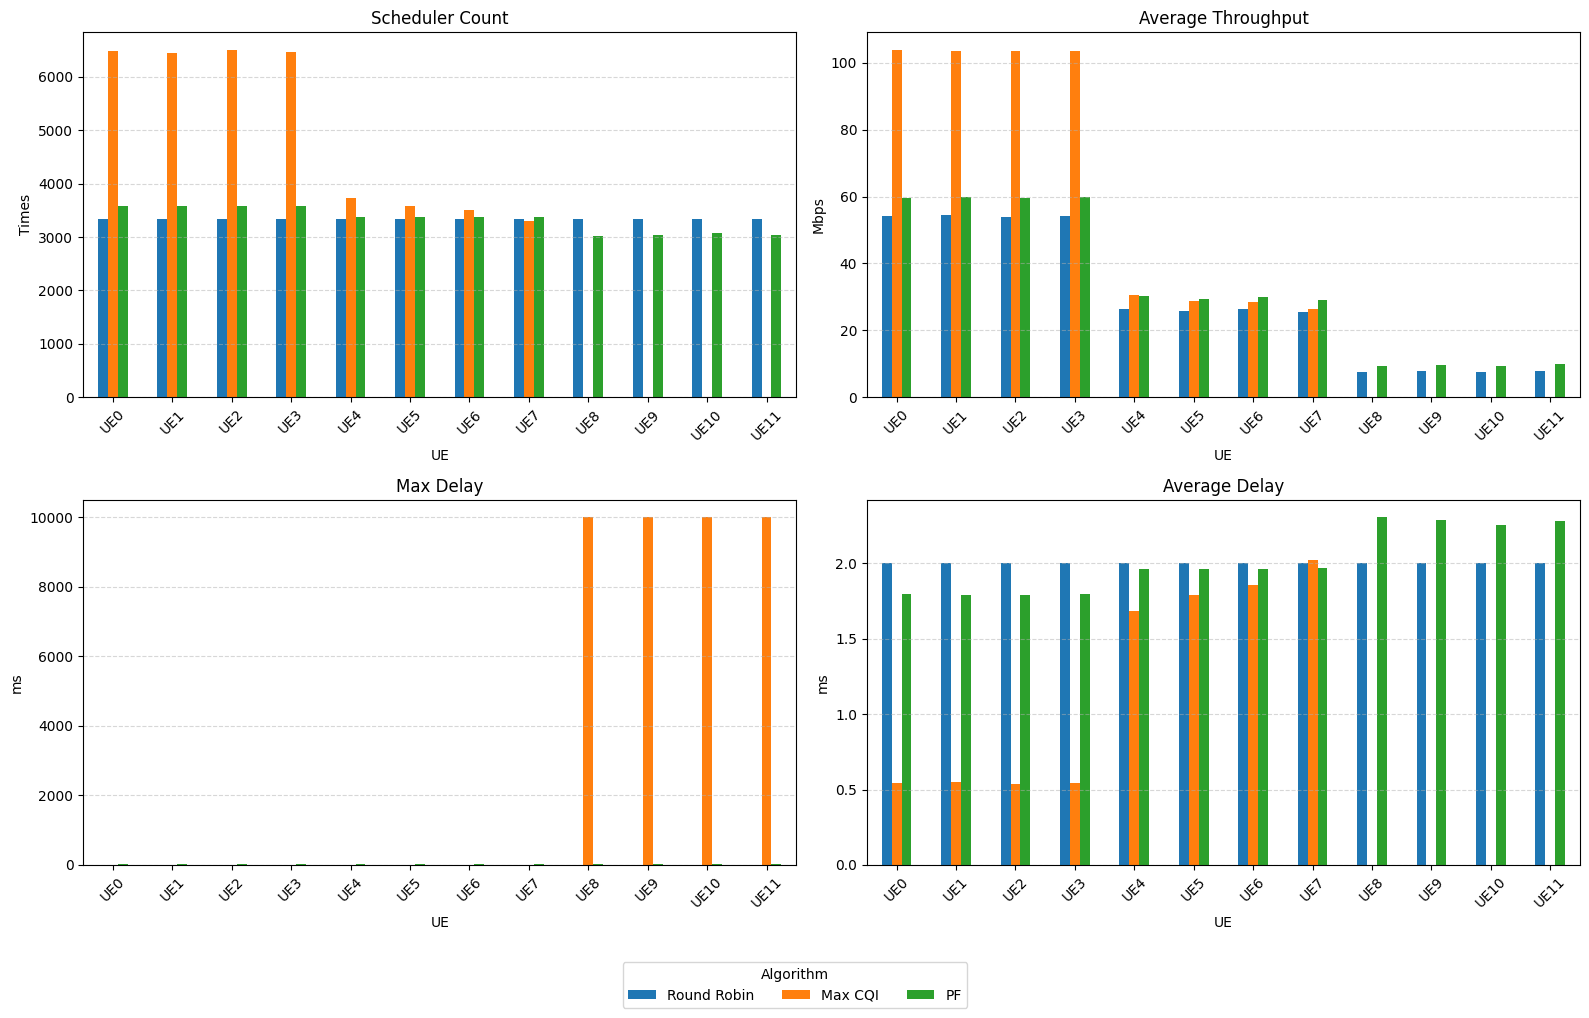

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(16, 10))  # Tạo 2x2 subplot grid

# Biểu đồ 1: Scheduler Count
scheduler_count_DF3.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title("Scheduler Count")
axes[0, 0].set_ylabel("Times")
axes[0, 0].set_xlabel("UE")
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.5)

# Biểu đồ 2: Average Throughput
avg_throughput_DF3.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title("Average Throughput")
axes[0, 1].set_ylabel("Mbps")
axes[0, 1].set_xlabel("UE")
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.5)

# Biểu đồ 3: Max Delay
max_delay_DF3.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title("Max Delay")
axes[1, 0].set_ylabel("ms")
axes[1, 0].set_xlabel("UE")
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.5)

# Biểu đồ 4: Average Delay
avg_delay_DF3.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title("Average Delay")
axes[1, 1].set_ylabel("ms")
axes[1, 1].set_xlabel("UE")
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.5)

# Xoá legend từng subplot
for ax in axes.flat:
    ax.legend().set_visible(False)

# Thêm legend chung ở dưới
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, title="Algorithm", loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol=3)

# Chừa khoảng bên dưới cho legend
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

## Total of Cell

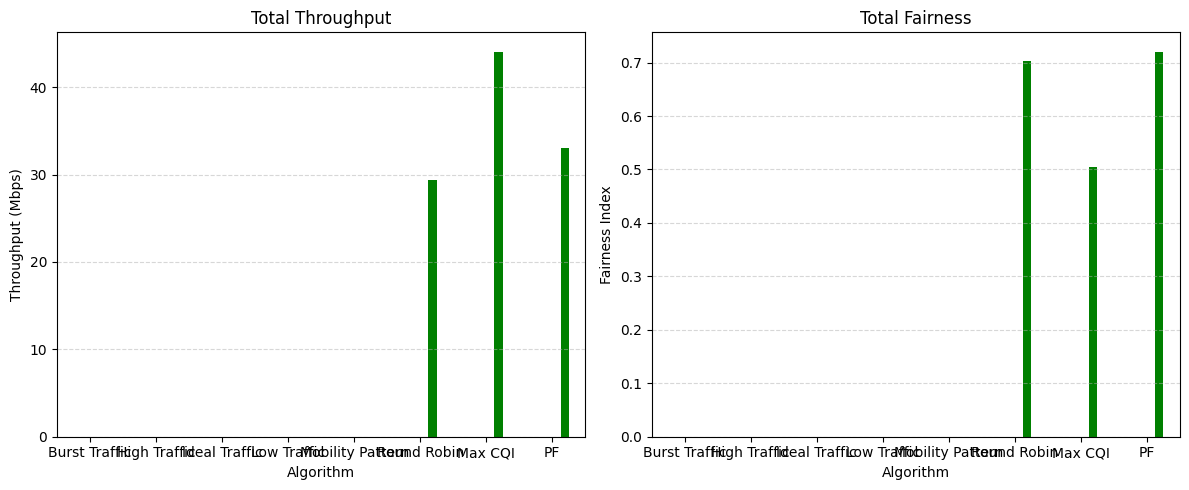

In [10]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot total throughput
total_throughput_DF1.plot(kind='bar', ax=axes[0], legend=False, color=['green', 'blue', 'orange'])
axes[0].set_title("Total Throughput")
axes[0].set_ylabel("Throughput (Mbps)")
axes[0].set_xlabel("Algorithm")
axes[0].set_xticklabels(total_throughput_DF1.index, rotation=0)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Plot total fairness
total_fairness_DF1.plot(kind='bar', ax=axes[1], legend=False, color=['green', 'blue', 'orange'])
axes[1].set_title("Total Fairness")
axes[1].set_ylabel("Fairness Index")
axes[1].set_xlabel("Algorithm")
axes[1].set_xticklabels(total_fairness_DF1.index, rotation=0)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
